# Donald Trump tweet sentiment analysis

In [174]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## 1. Downloading and Preparing the data<a name="introduction"></a>
source: http://www.trumptwitterarchive.com/archive

In [175]:
input_file = "C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/WordClouds/DonaldTrumpTweets_01052016_01052018.csv"

tweets = pd.read_csv(input_file)
tweets.tail()

,text
5698,Will be in Terre Haute Indiana in a short whil...
5699,I watched Sen. Graham @FaceTheNation. Why don'...
5700,Thank you Indiana! #Trump2016 https://t.co/shP...
5701,I will be in Indiana on Sunday and Monday at f...
5702,Thank you @MikeOzanian for the nice comments o...


In [176]:
input_file_nrs = "C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/WordClouds/DT_tweets_nrs_only.csv"
df_tweets_nrs=pd.read_csv(input_file_nrs)
df_tweets_nrs.tail()

,created_at,retweet_count,favorite_count,is_retweet
5698,05-01-2016 16:10,2804,10302,False
5699,05-01-2016 15:47,4018,13290,False
5700,05-01-2016 13:59,6359,16955,False
5701,05-01-2016 03:10,5599,17554,False
5702,04-30-2016 23:33:19,2541,9766,False


#### Combining the two dataframes

In [177]:
df_tweets = pd.merge(tweets, df_tweets_nrs, left_index=True, right_index=True)

df_tweets.tail()

,text,created_at,retweet_count,favorite_count,is_retweet
5698,Will be in Terre Haute Indiana in a short whil...,05-01-2016 16:10,2804,10302,False
5699,I watched Sen. Graham @FaceTheNation. Why don'...,05-01-2016 15:47,4018,13290,False
5700,Thank you Indiana! #Trump2016 https://t.co/shP...,05-01-2016 13:59,6359,16955,False
5701,I will be in Indiana on Sunday and Monday at f...,05-01-2016 03:10,5599,17554,False
5702,Thank you @MikeOzanian for the nice comments o...,04-30-2016 23:33:19,2541,9766,False


### Dealing with the Date & Time data; *created_at* -column
I need to split these into managable integers; year, month, day, hour, weekday and day of the year. <br>
I do this with Python's datetime function.<br>
I also create a couple of new date features; **Weekday** and **Day_of_year**.

In [178]:
df_tweets['Month'] = pd.to_datetime(df_tweets['created_at']).dt.month
df_tweets['Weekday'] = pd.to_datetime(df_tweets['created_at']).dt.weekday # 0=Monday, 1=Tuesday, etc.
df_tweets['Hour'] = pd.to_datetime(df_tweets['created_at']).dt.hour
df_tweets.head()

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour
0,I recently had a terrific meeting with a bipar...,04-30-2018 18:54:28,24315,100560,False,4,0,18
1,Numerous countries are being considered for th...,04-30-2018 12:19:33,19322,85587,False,4,0,12
2,The White House Correspondents’ Dinner is DEAD...,04-30-2018 12:10:58,22329,99724,False,4,0,12
3,Headline: “Kim Prepared to Cede Nuclear Weapon...,04-30-2018 02:59:23,19095,86504,False,4,0,2
4,The White House Correspondents’ Dinner was a f...,04-30-2018 02:38:00,22218,100972,False,4,0,2


### Sentiment analysis
#### Most liked

In [179]:
fav_max = np.max(df_tweets['favorite_count'])

fav = df_tweets[df_tweets.favorite_count == fav_max].index[0] # print(fav): 3574

print("The tweet with most likes/favourite counts is: \n{}".format(df_tweets['text'][fav]))
print("Number of likes: {}".format(fav_max))

The tweet with most likes/favourite counts is: 
Such a beautiful and important evening! The forgotten man and woman will never be forgotten again. We will all come together as never before
Number of likes: 633253


In [180]:
# second highest liked
fav3 = df_tweets['favorite_count'].nlargest(3)
print(df_tweets['text'][fav3])
#print("The tweet with most likes/favourite counts is: \n{}".format(df_tweets['text'][fav3]))
#print("Number of likes: {}".format(fav_max))

favorite_count
633253    NaN
616217    NaN
605098    NaN
Name: text, dtype: object


#### Most retweeted

In [181]:
rt_max  = np.max(df_tweets['retweet_count'])

rt  = df_tweets[df_tweets.retweet_count == rt_max].index[0]

print("The tweet with most retweets is: \n{}".format(df_tweets['text'][rt]))
print("Number of retweets: {}".format(rt_max))

The tweet with most retweets is: 
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
Number of retweets: 369530


In [182]:
text_array = df_tweets[['text']].as_matrix()
len(text_array) # 5703

5703

In [361]:
#A few lines of code for analyzing a single string only - mainly here for demonstrational purposes and possible future use
import nltk
from nltk.corpus import twitter_samples
from nltk.sentiment import SentimentIntensityAnalyzer
#from nltk.metrics import (accuracy as eval_accuracy, precision as eval_precision,
        #recall as eval_recall, f_measure as eval_f_measure)

nltk.sentiment.util.demo_vader_instance('It was great being with Luther Strange last night in Alabama. What great people what a crowd! Vote Luther on Tuesday.')


{'neu': 0.623, 'pos': 0.311, 'neg': 0.066, 'compound': 0.8268}


In [184]:
#Calculates the overall sentiment of all the 'text' fields in the tweet data; text_array =  df_tweets[['text']].as_matrix()
# --> See cell above. Mainly here for demonstrational purposes and possible future use
import nltk
from nltk.corpus import twitter_samples
from nltk.sentiment import SentimentIntensityAnalyzer

strings = str(text_array)
len(strings) #876
nltk.sentiment.util.demo_vader_instance(strings)


{'neu': 0.62, 'pos': 0.271, 'neg': 0.109, 'compound': 0.984}


In [ ]:
## Not performed after the initial run! Takes 30+ minutes. Thsi is the algorithm calculating the sentiment for each tweet
# The results were copy-pasted to a separate csv-file

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
from nltk import sentiment

df_tweets['SA'] = (df_tweets['text'].apply(nltk.sentiment.util.demo_liu_hu_lexicon))

In [186]:
#Reading in the file with sentiments created in the cell above
input_file = "C:/Users/jangn/CODE/Sundog_DataScience/DataScience/DataScience-Python3/data_sets/WordClouds/Sentiments.csv"
SA = pd.read_csv(input_file)
SA.head()

,Sentiment
0,Positive
1,Positive
2,Negative
3,Negative
4,Negative


#### Combining the tweet dataframe with the sentiment

In [187]:
tweets_SA = pd.merge(df_tweets, SA, left_index=True, right_index=True)
tweets_SA.head(5)

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour,Sentiment
0,I recently had a terrific meeting with a bipar...,04-30-2018 18:54:28,24315,100560,False,4,0,18,Positive
1,Numerous countries are being considered for th...,04-30-2018 12:19:33,19322,85587,False,4,0,12,Positive
2,The White House Correspondents’ Dinner is DEAD...,04-30-2018 12:10:58,22329,99724,False,4,0,12,Negative
3,Headline: “Kim Prepared to Cede Nuclear Weapon...,04-30-2018 02:59:23,19095,86504,False,4,0,2,Negative
4,The White House Correspondents’ Dinner was a f...,04-30-2018 02:38:00,22218,100972,False,4,0,2,Negative


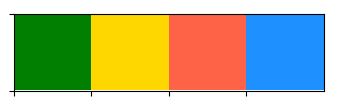

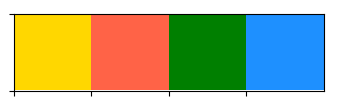

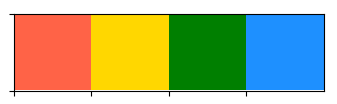

In [188]:
#These were just color palettes I created as a support for the various charts
plt.rcdefaults()
own_palette_1= ["g", "#FFD700", "#FF6347", "#1E90FF"]
sns.set_palette(own_palette_1)
sns.palplot(sns.color_palette())
own_palette_2= [ "#FFD700", "#FF6347", "g", "#1E90FF"]
sns.set_palette(own_palette_2)
sns.palplot(sns.color_palette())
own_palette_3= [ "#FF6347", "#FFD700",  "g", "#1E90FF"]
sns.set_palette(own_palette_3)
sns.palplot(sns.color_palette())
plt.show()

### Counting the number of tweets in each sentiment

In [189]:
tweets_SA.Sentiment.value_counts()

Positive    2674
Neutral     1572
Negative    1457
Name: Sentiment, dtype: int64

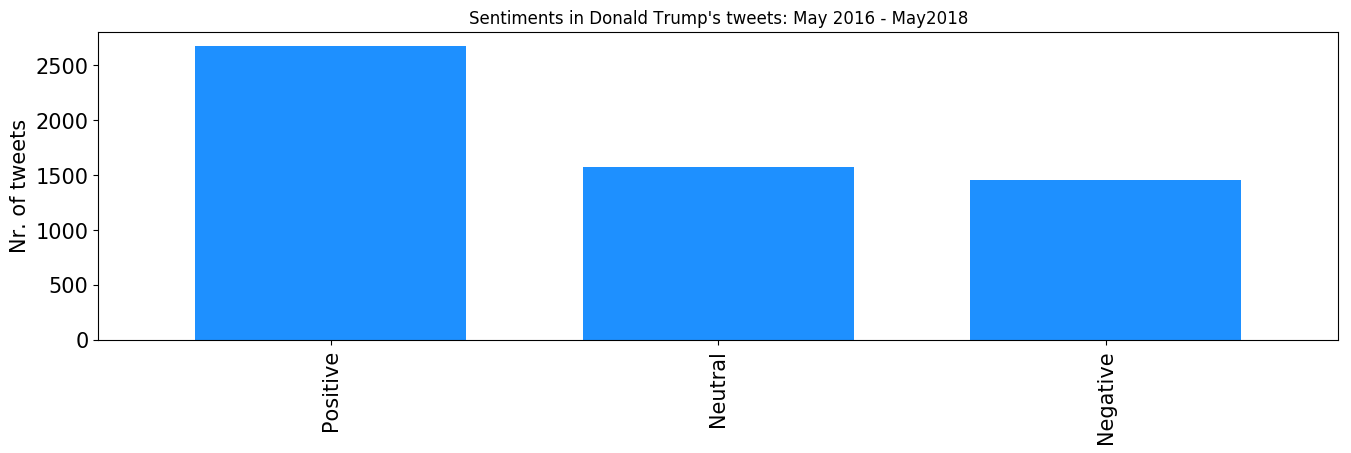

In [190]:
pd.Series(tweets_SA["Sentiment"]).value_counts().plot(kind = "bar", width=0.7,
                        figsize=(16,4),fontsize=15, color='#1E90FF', title = "Sentiments in Donald Trump's tweets: May 2016 - May2018" )
#plt.xlabel('Sentiment', fontsize=10)
plt.ylabel('Nr. of tweets', fontsize=15);
plt.show()

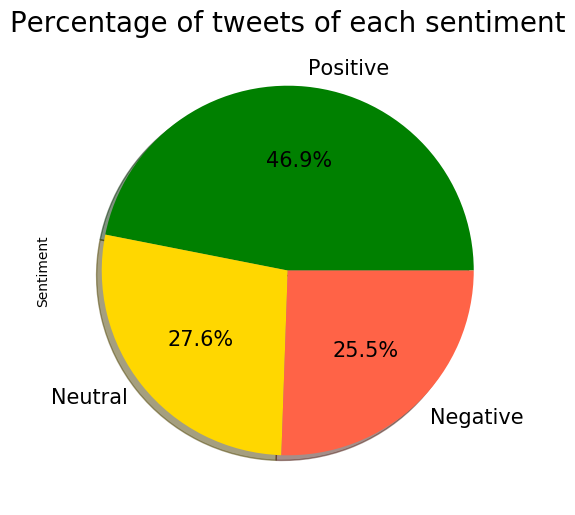

In [191]:
pd.Series(tweets_SA["Sentiment"]).value_counts().plot(kind="pie", colors=sns.color_palette(own_palette_1, 10),
    labels=["Positive", "Neutral",  "Negative", "Positive"],
    shadow=True,autopct='%.1f%%', fontsize=15,figsize=(6, 6))
plt.title("Percentage of tweets of each sentiment", fontsize=20);
plt.show()

### Top 5 of Most Favorited tweets in each sentiment


In [352]:
#POSITIVE
positive_tweets = tweets_SA.query("Sentiment == 'Positive'" )
Top_Pos = positive_tweets.sort_values("favorite_count", ascending=False)
Top_Pos['text'].head()

3574    Such beautiful important evening! The forgotte...
3586                   TODAY WE MAKE AMERICA GREAT AGAIN!
3186    Peaceful protests hallmark democracy. Even I a...
33              Thank Kanye cool! https://t.co/vRIC87M21X
3192    THANK YOU another wonderful evening Washington...
Name: text, dtype: object

In [193]:
#NEUTRAL
neutral_tweets = tweets_SA.query("Sentiment == 'Neutral'" )
Top_Neu = neutral_tweets.sort_values("favorite_count", ascending=False)
Top_Neu['text'].head()

2300           #FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
1485    My warmest condolences and sympathies to the v...
5276    How long did it take your staff of 823 people ...
1044    Now that the three basketball players are out ...
4941    The media is spending more time doing a forens...
Name: text, dtype: object

In [194]:
#NEGATIVE
negative_tweets = tweets_SA.query("Sentiment == 'Negative'" )
Top_Neg = negative_tweets.sort_values("favorite_count", ascending=False)
Top_Neg['text'].head()

1094    Why would Kim Jong-un insult me by calling me ...
3349    Happy New Year to all including to my many ene...
296     Crazy Joe Biden is trying to act like a tough ...
3129    Everybody is arguing whether or not it is a BA...
3148    Our country needs strong borders and extreme v...
Name: text, dtype: object

In [195]:
#Hour of day vs sentiment
hour_of_day =pd.crosstab(tweets_SA.Hour, tweets_SA.Sentiment)
hour_of_day 

Sentiment,Negative,Neutral,Positive
Hour,,,
0,52,62,154
1,62,100,141
2,74,103,157
3,31,36,103
4,15,26,56
5,7,9,30
6,1,5,11
7,3,2,10
8,1,2,2


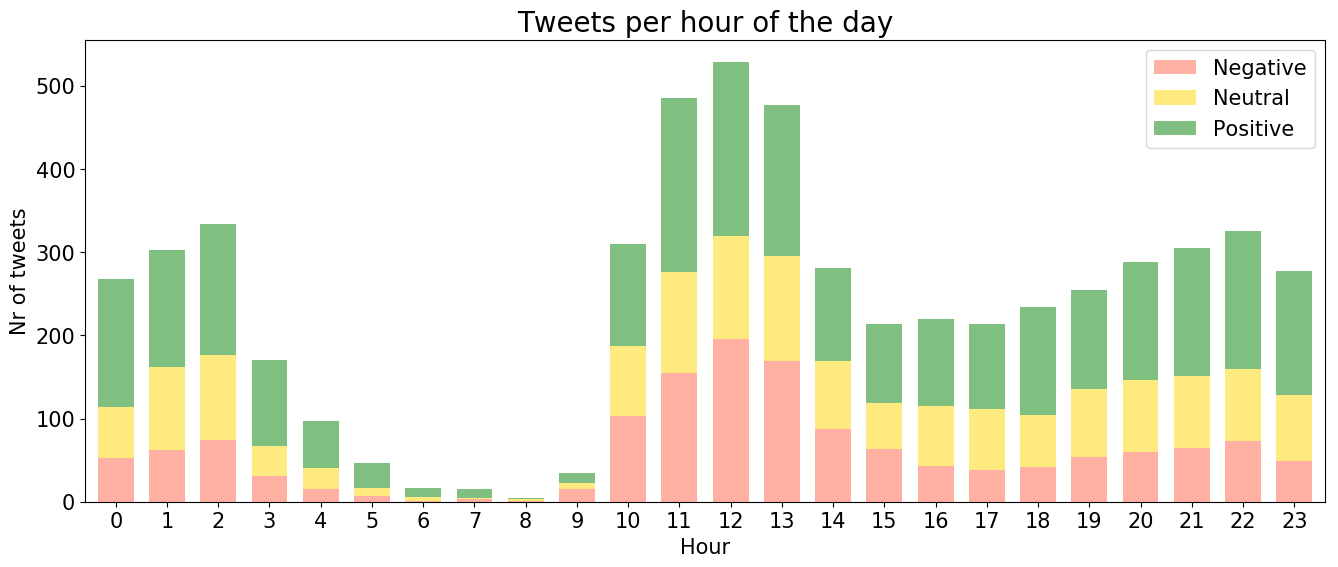

In [196]:
pd.crosstab(index = tweets_SA["Hour"],columns = tweets_SA["Sentiment"]).plot(kind='bar',fontsize=15, color=sns.color_palette(own_palette_3, 10),
                figsize=(16, 6),alpha=0.5,rot=0,width=0.7, stacked=True,title="Tweets per hour of the day")
plt.title("Tweets per hour of the day", fontsize=20)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Nr of tweets', fontsize=15)
plt.legend(fontsize=15);
plt.show()

In [197]:
#Taking a closer look at the tweets around 9 am
nine_am =pd.crosstab(tweets_SA.Hour==9, tweets_SA.Sentiment)
nine_am

Sentiment,Negative,Neutral,Positive
Hour,,,
False,1442,1564,2662
True,15,8,12


In [198]:
#Weekday vs sentiment
day_of_week =pd.crosstab(tweets_SA.Weekday, tweets_SA.Sentiment)
day_of_week

Sentiment,Negative,Neutral,Positive
Weekday,,,
0,206,201,314
1,204,252,434
2,210,242,481
3,191,252,427
4,210,248,406
5,209,216,332
6,227,161,280


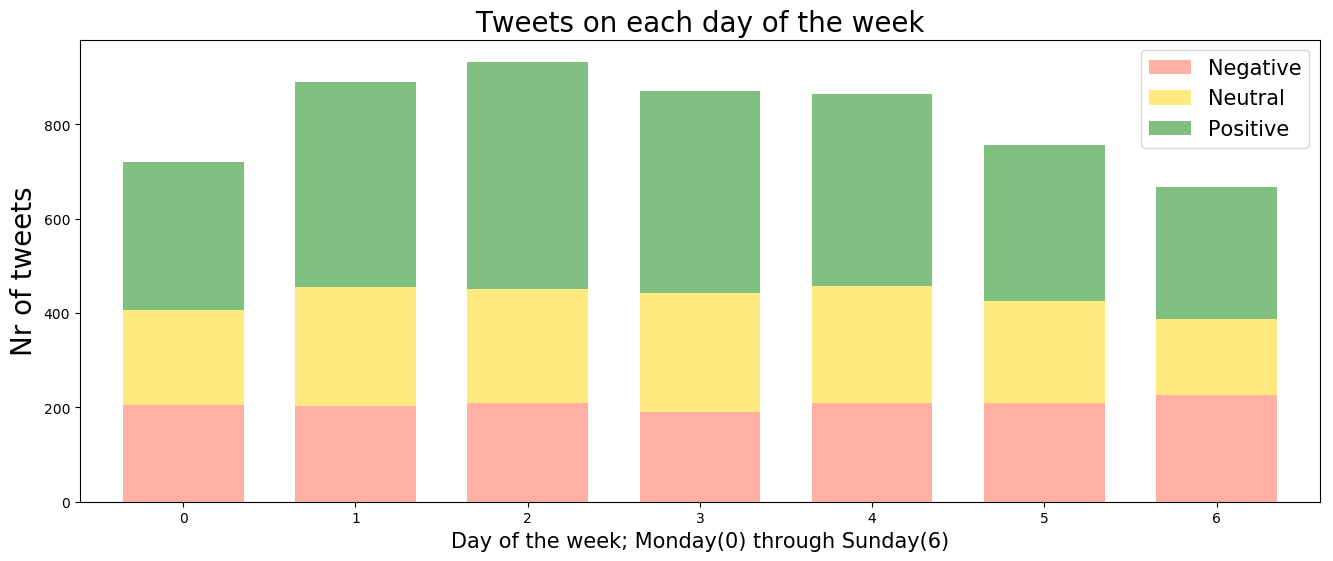

In [199]:
pd.crosstab(index = tweets_SA["Weekday"],columns = tweets_SA["Sentiment"]).plot(kind='bar',color=sns.color_palette(own_palette_3, 10),
                figsize=(16, 6),alpha=0.5,rot=0,width=0.7,stacked=True)
plt.title("Tweets on each day of the week", fontsize=20)
plt.xlabel('Day of the week; Monday(0) through Sunday(6)', fontsize=15)

plt.ylabel('Nr of tweets', fontsize=20)
plt.legend(fontsize=15);
plt.show()


### Dealing with the text data

In [200]:
tweets_SA.head()

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour,Sentiment
0,I recently had a terrific meeting with a bipar...,04-30-2018 18:54:28,24315,100560,False,4,0,18,Positive
1,Numerous countries are being considered for th...,04-30-2018 12:19:33,19322,85587,False,4,0,12,Positive
2,The White House Correspondents’ Dinner is DEAD...,04-30-2018 12:10:58,22329,99724,False,4,0,12,Negative
3,Headline: “Kim Prepared to Cede Nuclear Weapon...,04-30-2018 02:59:23,19095,86504,False,4,0,2,Negative
4,The White House Correspondents’ Dinner was a f...,04-30-2018 02:38:00,22218,100972,False,4,0,2,Negative


### Common word removal - not performed!
I can also remove commonly occurring words from the text data. Let’s check the 25 most frequently occurring words in the text data. The logic is that the commonly used words usually do not contribute to finding relevant differences and nuances in text data. Looking at the contents of POTUS' tweets, removing common words from the analysis would not exclude many significant words, except for perhaps "I", appearing over 1100 times in c. 5700 tweets. 

In [201]:
common_words = pd.Series(' '.join(df_tweets['text']).split()).value_counts()[:25] 
common_words

the      4313
to       3057
and      2584
of       2157
in       1754
a        1647
is       1514
for      1257
I        1146
on       1038
will     1026
be        870
are       834
with      812
our       773
that      756
&amp;     738
you       700
at        648
The       631
have      606
-         531
was       519
great     515
RT        497
dtype: int64

If we'd want to remove these words the follwoing code could be run

In [202]:
#common_words = list(common_words.index)
#tweets_SA['text'] = tweets_SA['text'].apply(lambda x: " ".join(x for x in x.split() if x not in common_words))
#tweets_SA['text'].head()

### Rare words removal - not performed after all
Similarly, just as I removed the most common words, maybe rarely occurring words should also be from the text. Because they’re so rare, the association between them and other words is dominated by noise. However, I will just assume that their impact on the final results would only be marginal. The following piece of code helps you to identify them, if needed. Here i only list the 10 rarest words. The list can be made longer by adjusting the n-figure in  **value_counts()[-n:]** 

In [203]:
rare_words = pd.Series(' '.join(tweets_SA['text']).split()).value_counts()[-25:] # the figure adjusts the length of the list of rare words 
rare_words

Wife'                                    1
terrible!                                1
https://t.co/8cZLdAbgzw                  1
witch-hunt                               1
https://t.co/SQs6ERk6El                  1
flowing                                  1
https://t.co/bwxirLtPXY                  1
Jersey:                                  1
diminish                                 1
unaccepting                              1
https://t.co/4otZyjYLc2                  1
tickets:https://t.co/McBZgICMgsLynden    1
Assembly                                 1
Gathering                                1
https://t.co/ravfFT5UBE                  1
F.E.C.                                   1
Dakota!                                  1
AGAIN🇺🇸                                  1
Treasury                                 1
Taormina                                 1
https://t.co/0lXKMUoPE9                  1
⚾️                                       1
describe                                 1
Flowers    

### Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. I do this separately for the four text columns and create additional columns for each to store the tokenized list of strings.

In [204]:
from nltk.tokenize import word_tokenize
tweets_SA['tokenized_text'] = tweets_SA['text'].apply(word_tokenize) 
tweets_SA['tokenized_text'].head()

0    [I, recently, had, a, terrific, meeting, with,...
1    [Numerous, countries, are, being, considered, ...
2    [The, White, House, Correspondents, ’, Dinner,...
3    [Headline, :, “, Kim, Prepared, to, Cede, Nucl...
4    [The, White, House, Correspondents, ’, Dinner,...
Name: tokenized_text, dtype: object

### Lemmatization
Lemmatization converts the word into its root word, rather than just stripping the suffices, as in Stemming. <br>

In [205]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [206]:
from textblob import Word

tweets_SA['lemmatized_text'] = tweets_SA['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
tweets_SA['lemmatized_text'].tail()

5698    Will be in Terre Haute Indiana in a short whil...
5699    I watched Sen. Graham @FaceTheNation. Why don'...
5700    Thank you Indiana! #Trump2016 https://t.co/shP...
5701    I will be in Indiana on Sunday and Monday at f...
5702    Thank you @MikeOzanian for the nice comment on...
Name: lemmatized_text, dtype: object

In [209]:
tweets_SA.head()

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour,Sentiment,tokenized_text,lemmatized_text
0,I recently had a terrific meeting with a bipar...,04-30-2018 18:54:28,24315,100560,False,4,0,18,Positive,"[I, recently, had, a, terrific, meeting, with,...",I recently had a terrific meeting with a bipar...
1,Numerous countries are being considered for th...,04-30-2018 12:19:33,19322,85587,False,4,0,12,Positive,"[Numerous, countries, are, being, considered, ...",Numerous country are being considered for the ...
2,The White House Correspondents’ Dinner is DEAD...,04-30-2018 12:10:58,22329,99724,False,4,0,12,Negative,"[The, White, House, Correspondents, ’, Dinner,...",The White House Correspondents’ Dinner is DEAD...
3,Headline: “Kim Prepared to Cede Nuclear Weapon...,04-30-2018 02:59:23,19095,86504,False,4,0,2,Negative,"[Headline, :, “, Kim, Prepared, to, Cede, Nucl...",Headline: “Kim Prepared to Cede Nuclear Weapon...
4,The White House Correspondents’ Dinner was a f...,04-30-2018 02:38:00,22218,100972,False,4,0,2,Negative,"[The, White, House, Correspondents, ’, Dinner,...",The White House Correspondents’ Dinner wa a fa...


### Making the Word Cloud


#### Removal of Stop Words - performed after the sentiment analysis 
Stop words (or commonly occurring words) should be removed from the text data before making the WordCloud. They were stil included while making the sentiment analysis, though.<br>
For this purpose, we can either create a list of stopwords ourselves or we can use predefined libraries, like the NLTK library.

In [248]:
import nltk
nltk.download()
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweets_SA['lemmatized_text'] = tweets_SA['lemmatized_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
tweets_SA['lemmatized_text'].head()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


0    I recently terrific meeting bipartisan group f...
1    Numerous country considered MEETING would Peac...
2    The White House Correspondents’ Dinner DEAD kn...
3    Headline: “Kim Prepared Cede Nuclear Weapons U...
4    The White House Correspondents’ Dinner wa fail...
Name: lemmatized_text, dtype: object

In [249]:
#Combining all text in tweets into an array for the WordCloud using .tolist()
text_array = tweets_SA['lemmatized_text'].as_matrix().tolist()
#text_array.shape # shape= (5703,)
#len(text_array) # length 5703
print(text_array)


['I recently terrific meeting bipartisan group freshman lawmaker feel strongly favor Congressional term limits. I gave full support endorsement efforts. #DrainTheSwamp', 'Numerous country considered MEETING would Peace House/Freedom House Border North &amp; South Korea Representative Important Lasting site third party country? Just asking!', 'The White House Correspondents’ Dinner DEAD know it. This wa total disaster embarrassment great Country stand for. FAKE NEWS alive well beautifully represented Saturday night!', 'Headline: “Kim Prepared Cede Nuclear Weapons U.S. Pledges Not Invade” - Failing New York Times. Also shut Nuclear Test Site May.', 'The White House Correspondents’ Dinner wa failure last year year wa embarrassment everyone associated it. The filthy “comedian” totally bombed (couldn’t even deliver lines-much like Seth Meyers weak performance). Put Dinner rest start over!', '“Trump’s Triumphs driving critic Crazy!” Thank Steve Hilton @NextRevFNC want right wonderful U.S.A.'

In [250]:
strings = ''.join(text_array)
#print(strings)
#len(strings)

#### Removal of the prefixes https//: and http//:
I decided to remove these since they do not add any real value and will also be over-represented when creating the WordCloud <br>A separate analysis could be done focusing only on the tweets with links!

In [347]:
import re
def clean_tweet(strings):
    tweet = re.sub('http\S+\s*', '', strings)  # remove URLs; http, https,... # 
    return tweet

print(clean_tweet(strings))

I recently terrific meeting bipartisan group freshman lawmaker feel strongly favor Congressional term limits. I gave full support endorsement efforts. #DrainTheSwampNumerous country considered MEETING would Peace House/Freedom House Border North &amp; South Korea Representative Important Lasting site third party country? Just asking!The White House Correspondents’ Dinner DEAD know it. This wa total disaster embarrassment great Country stand for. FAKE NEWS alive well beautifully represented Saturday night!Headline: “Kim Prepared Cede Nuclear Weapons U.S. Pledges Not Invade” - Failing New York Times. Also shut Nuclear Test Site May.The White House Correspondents’ Dinner wa failure last year year wa embarrassment everyone associated it. The filthy “comedian” totally bombed (couldn’t even deliver lines-much like Seth Meyers weak performance). Put Dinner rest start over!“Trump’s Triumphs driving critic Crazy!” Thank Steve Hilton @NextRevFNC want right wonderful U.S.A.Just got recent Poll - 

#### Final format of the words used
The WordClouds are built on tweets on which lemmatization was performed but not common words removal nor rare words removal.

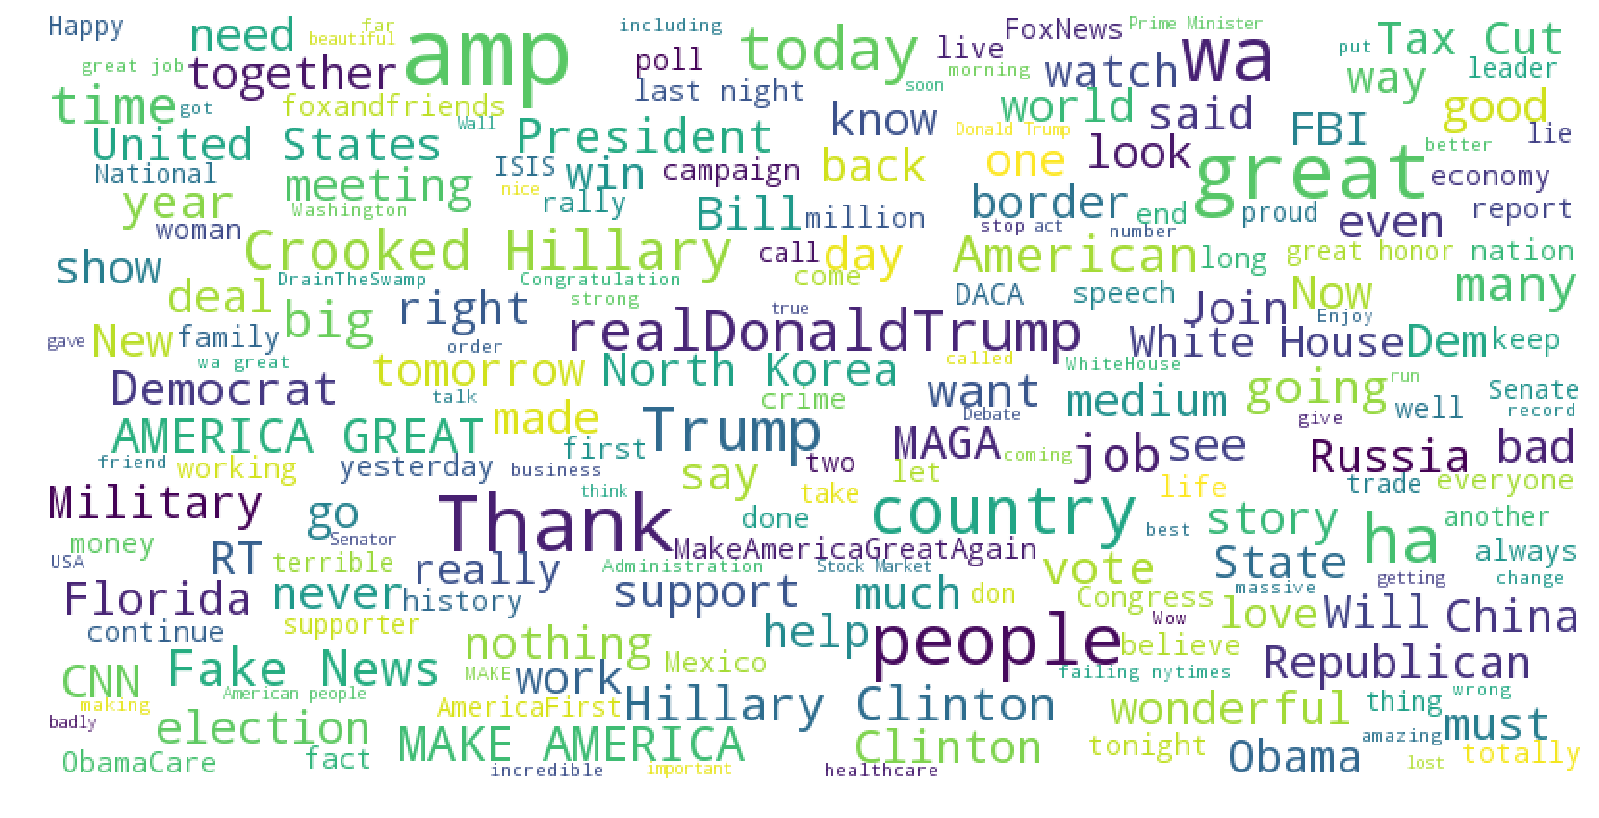

In [348]:
from wordcloud import WordCloud

cloud = WordCloud(background_color="white", random_state=42, width=800, height=400, max_words=200, prefer_horizontal=1.0,font_step
=1 ,                        max_font_size=50,).generate(clean_tweet(strings))

plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution!! 200x100 is already pretty good!
plt.imshow(cloud)
plt.axis('off')
plt.show()

## Separating the tweets into three dataframes based on their sentiment; Neutral, Positive and Negative

### Neutral tweets

In [253]:
neutral_tweets = tweets_SA.query("Sentiment == 'Neutral'" )
neutral_tweets.head()  # length: 1572
#len(neutral_tweets)

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour,Sentiment,tokenized_text,lemmatized_text
9,Join LIVE Washington Michigan 7:00pmE @FoxNews...,04-28-2018 22:45:49,8470,49947,False,4,5,22,Neutral,"[Join, me, LIVE, in, Washington, Michigan, at,...",Join LIVE Washington Michigan 7:00pmE @FoxNews...
16,House Intelligence Committee rules NO COLLUSIO...,04-28-2018 02:04:31,27256,112080,False,4,5,2,Neutral,"[House, Intelligence, Committee, rules, that, ...",House Intelligence Committee rule wa NO COLLUS...
17,House Intelligence Committee rules NO COLLUSIO...,04-28-2018 01:19:53,7240,26462,False,4,5,1,Neutral,"[House, Intelligence, Committee, rules, that, ...",House Intelligence Committee rule wa NO COLLUS...
19,I urge Americans participate #takebackday tomo...,04-27-2018 19:23:23,11768,48498,False,4,4,19,Neutral,"[I, urge, all, Americans, to, participate, in,...",I urge Americans participate #takebackday tomo...
27,After furious year missile launches Nuclear te...,04-27-2018 10:41:23,25382,119052,False,4,4,10,Neutral,"[After, a, furious, year, of, missile, launche...",After furious year missile launch Nuclear test...


In [254]:
neutral_favorite_sorted = neutral_tweets.sort_values("favorite_count", ascending=False)
neutral_favorite_sorted.head(5)

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour,Sentiment,tokenized_text,lemmatized_text
2300,#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg,07-02-2017 13:21,369530,605098,False,7,6,13,Neutral,"[#, FraudNewsCNN, #, FNN, https, :, //t.co/WYU...",#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
1485,My warmest condolences sympathies victims fami...,10-02-2017 11:11,75476,317744,False,10,0,11,Neutral,"[My, warmest, condolences, and, sympathies, to...",My warmest condolence sympathy victim family t...
5276,How long take staff 823 people think up--and 3...,06-09-2016 20:40,168765,297281,False,6,3,20,Neutral,"[How, long, did, it, take, your, staff, of, 82...",How long take staff 823 people think up--and 3...
1044,Now three basketball players China saved years...,11-19-2017 17:42:36,77081,275392,False,11,6,17,Neutral,"[Now, that, the, three, basketball, players, a...",Now three basketball player China saved year j...
4941,The media spending time forensic analysis Mela...,07-20-2016 15:36:06,120661,249249,False,7,2,15,Neutral,"[The, media, is, spending, more, time, doing, ...",The medium spending time forensic analysis Mel...


In [255]:
neutral_retweet_sorted = neutral_tweets.sort_values("retweet_count", ascending=False)
neutral_retweet_sorted.head(5)

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour,Sentiment,tokenized_text,lemmatized_text
2300,#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg,07-02-2017 13:21,369530,605098,False,7,6,13,Neutral,"[#, FraudNewsCNN, #, FNN, https, :, //t.co/WYU...",#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
5276,How long take staff 823 people think up--and 3...,06-09-2016 20:40,168765,297281,False,6,3,20,Neutral,"[How, long, did, it, take, your, staff, of, 82...",How long take staff 823 people think up--and 3...
4941,The media spending time forensic analysis Mela...,07-20-2016 15:36:06,120661,249249,False,7,2,15,Neutral,"[The, media, is, spending, more, time, doing, ...",The medium spending time forensic analysis Mel...
1044,Now three basketball players China saved years...,11-19-2017 17:42:36,77081,275392,False,11,6,17,Neutral,"[Now, that, the, three, basketball, players, a...",Now three basketball player China saved year j...
1485,My warmest condolences sympathies victims fami...,10-02-2017 11:11,75476,317744,False,10,0,11,Neutral,"[My, warmest, condolences, and, sympathies, to...",My warmest condolence sympathy victim family t...


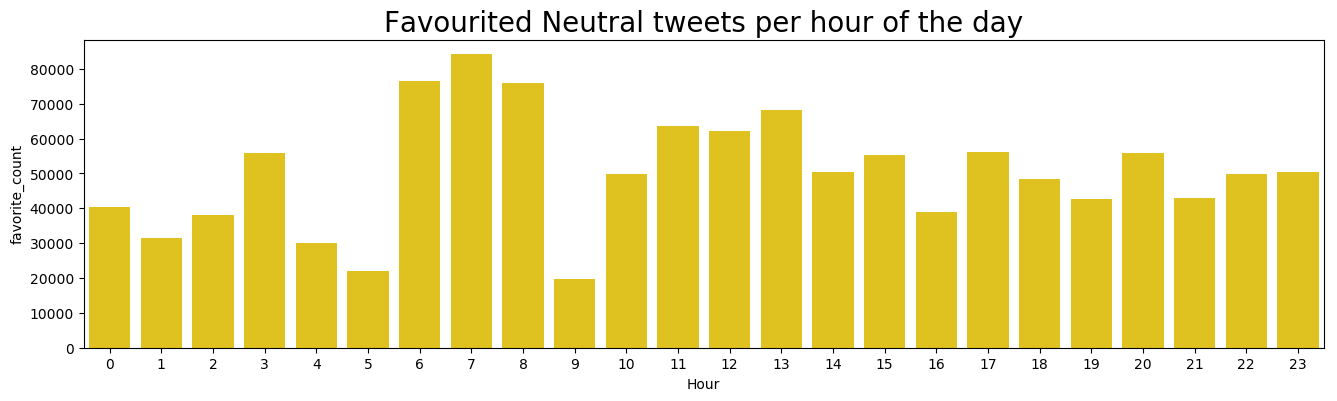

In [256]:
f, ax = plt.subplots(figsize=(16, 4))
#my_palette = sns.color_palette("Wistia")
plt.title("Favourited Neutral tweets per hour of the day", fontsize=20)
sns.barplot( x='Hour', y='favorite_count',  data=neutral_favorite_sorted,color='gold', ci=None);
plt.show()

In [257]:
neutral_array = neutral_tweets['lemmatized_text'].as_matrix().tolist()
#print(neutral_array)

In [258]:
neutral_strings = ''.join(neutral_array)
#print(neutral_strings)

In [283]:
import re
def clean_tweet(neutral_strings):
    tweet = re.sub('http\S+\s*' , '', neutral_strings)  # remove URLs; http, https,...
    
    return tweet 
#print(clean_tweet(neutral_strings))

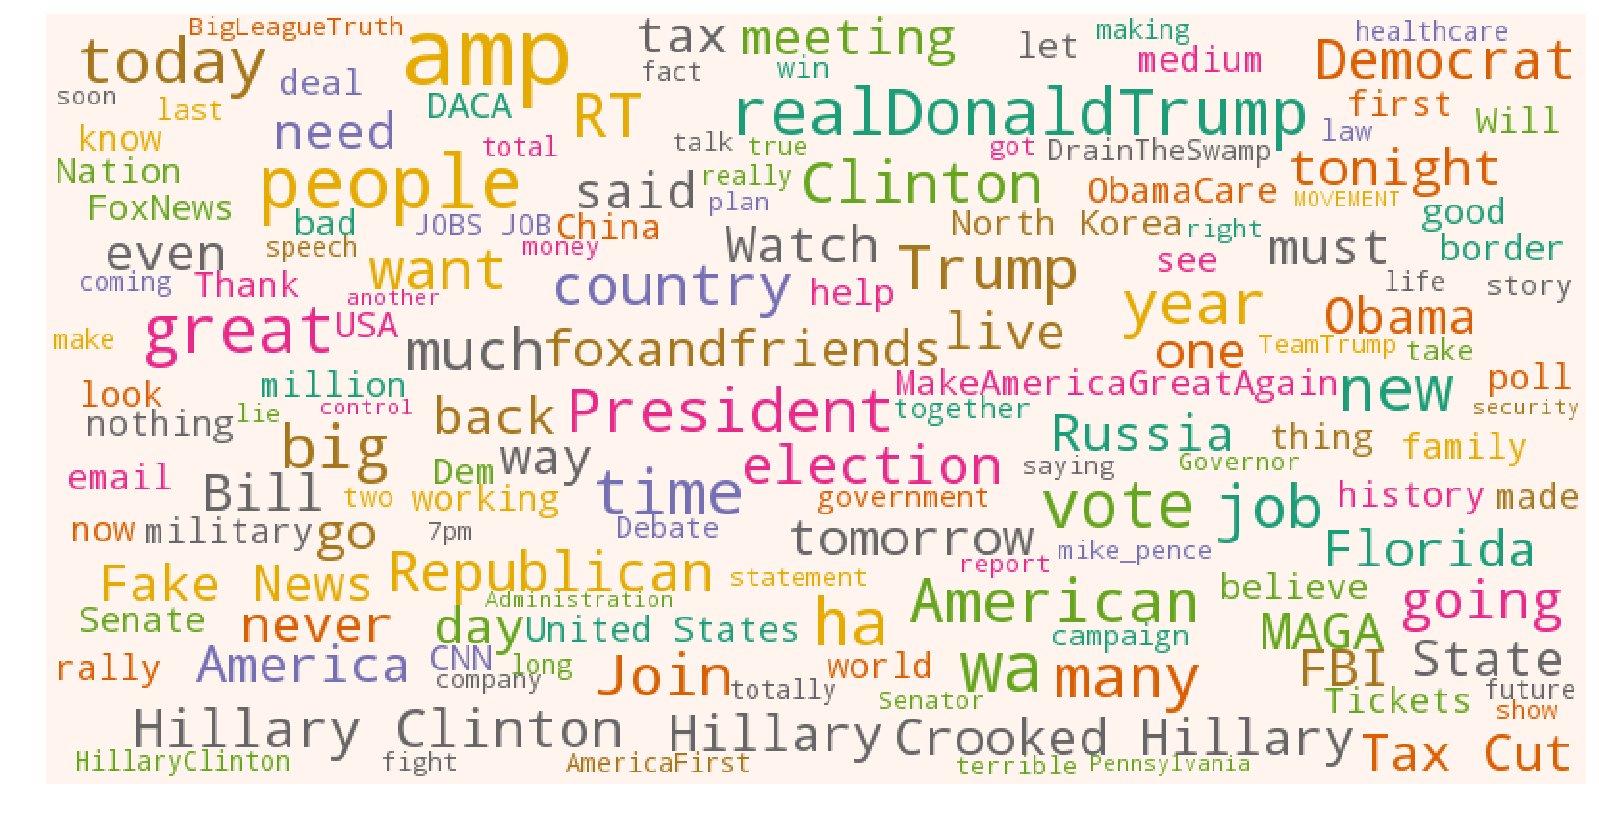

In [370]:
cloud = WordCloud(background_color="seashell", random_state=42, width=800, height=400, max_words=150, colormap='Dark2',prefer_horizontal=1.0,
                          max_font_size=50,).generate(clean_tweet(neutral_strings))
# own_palette_1= ["g",
plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution!! 200x100 is already pretty good!
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Positive tweets

In [227]:
positive_tweets = tweets_SA.query("Sentiment == 'Positive'" )
positive_tweets.head()  # length: 2674
len(positive_tweets)

2674

In [228]:
positive_favorite_sorted = positive_tweets.sort_values("favorite_count", ascending=False)
positive_favorite_sorted.head(5)

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour,Sentiment,tokenized_text,lemmatized_text
3574,Such beautiful important evening! The forgotte...,11-09-2016 11:36,220796,633253,False,11,2,11,Positive,"[Such, a, beautiful, and, important, evening, ...",Such beautiful important evening! The forgotte...
3586,TODAY WE MAKE AMERICA GREAT AGAIN!,11-08-2016 11:43,344806,573283,False,11,1,11,Positive,"[TODAY, WE, MAKE, AMERICA, GREAT, AGAIN, !]",TODAY WE MAKE AMERICA GREAT AGAIN!
3186,Peaceful protests hallmark democracy. Even I a...,01-22-2017 14:23:17,81527,390826,False,1,6,14,Positive,"[Peaceful, protests, are, a, hallmark, of, our...",Peaceful protest hallmark democracy. Even I al...
33,Thank Kanye cool! https://t.co/vRIC87M21X,04-25-2018 19:33:07,108482,360127,False,4,2,19,Positive,"[Thank, you, Kanye, very, cool, !, https, :, /...",Thank Kanye cool! https://t.co/vRIC87M21X
3192,THANK YOU another wonderful evening Washington...,01-21-2017 04:56:15,52468,289942,False,1,5,4,Positive,"[THANK, YOU, for, another, wonderful, evening,...",THANK YOU another wonderful evening Washington...


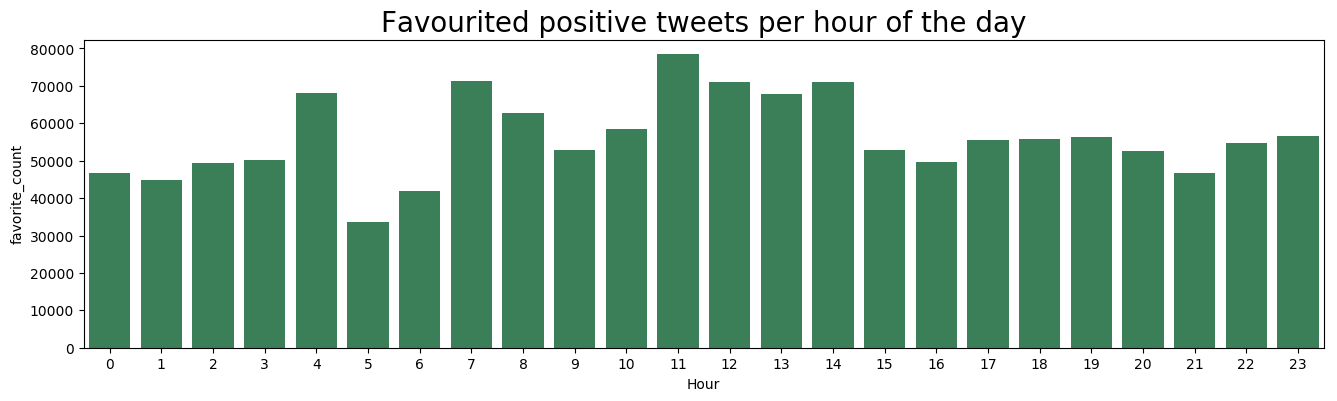

In [229]:
f, ax = plt.subplots(figsize=(16, 4))
#my_palette = sns.color_palette("summer")   
plt.title("Favourited positive tweets per hour of the day", fontsize=20)
sns.barplot( x='Hour', y='favorite_count', color='seagreen', data=positive_favorite_sorted, ci=None);
plt.show()

In [230]:
positive_array = positive_tweets['lemmatized_text'].as_matrix().tolist()

In [231]:
positive_strings = ''.join(positive_array)

In [232]:
import re
def clean_tweet(positive_strings):
    tweet = re.sub('http\S+\s*', '', positive_strings)  # remove URLs; http, https,...
    return tweet

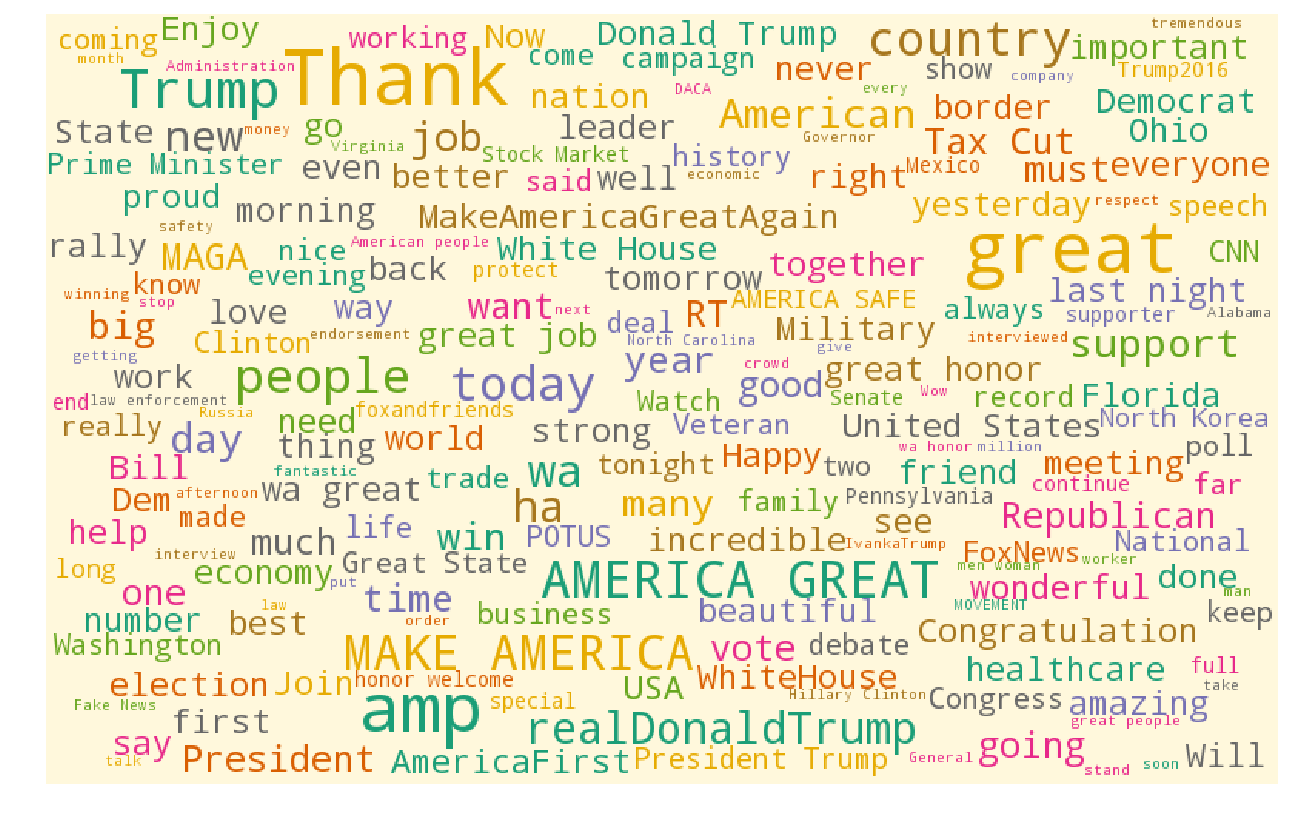

In [400]:
cloud = WordCloud(background_color="cornsilk", random_state=42, width=800, height=500, max_words=200, colormap='Dark2', color_func=None, prefer_horizontal=1.0,
                          max_font_size=50,).generate(clean_tweet(positive_strings))

plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution!! 200x100 is already pretty good!
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Negative tweets

In [234]:
negative_tweets = tweets_SA.query("Sentiment == 'Negative'" )
negative_tweets.head()  # length: 1457
len(negative_tweets)

1457

In [235]:
negative_favorite_sorted = negative_tweets.sort_values("favorite_count", ascending=False)
negative_favorite_sorted.head(5)

,text,created_at,retweet_count,favorite_count,is_retweet,Month,Weekday,Hour,Sentiment,tokenized_text,lemmatized_text
1094,"Why would Kim Jong-un insult calling ""old"" I w...",11-12-2017 00:48,272776,616217,False,11,6,0,Negative,"[Why, would, Kim, Jong-un, insult, me, by, cal...","Why would Kim Jong-un insult calling ""old"" I w..."
3349,Happy New Year including many enemies fought l...,12-31-2016 13:17:21,141853,350860,False,12,5,13,Negative,"[Happy, New, Year, to, all, including, to, my,...",Happy New Year including many enemy fought los...
296,Crazy Joe Biden trying act like tough guy. Act...,03-22-2018 10:19:57,75713,258162,False,3,3,10,Negative,"[Crazy, Joe, Biden, is, trying, to, act, like,...",Crazy Joe Biden trying act like tough guy. Act...
3129,Everybody arguing whether BAN. Call want keepi...,02-01-2017 12:50,60583,252382,False,2,2,12,Negative,"[Everybody, is, arguing, whether, or, not, it,...",Everybody arguing whether BAN. Call want keepi...
3148,Our country needs strong borders extreme vetti...,01-29-2017 13:08:18,50439,218717,False,1,6,13,Negative,"[Our, country, needs, strong, borders, and, ex...",Our country need strong border extreme vetting...


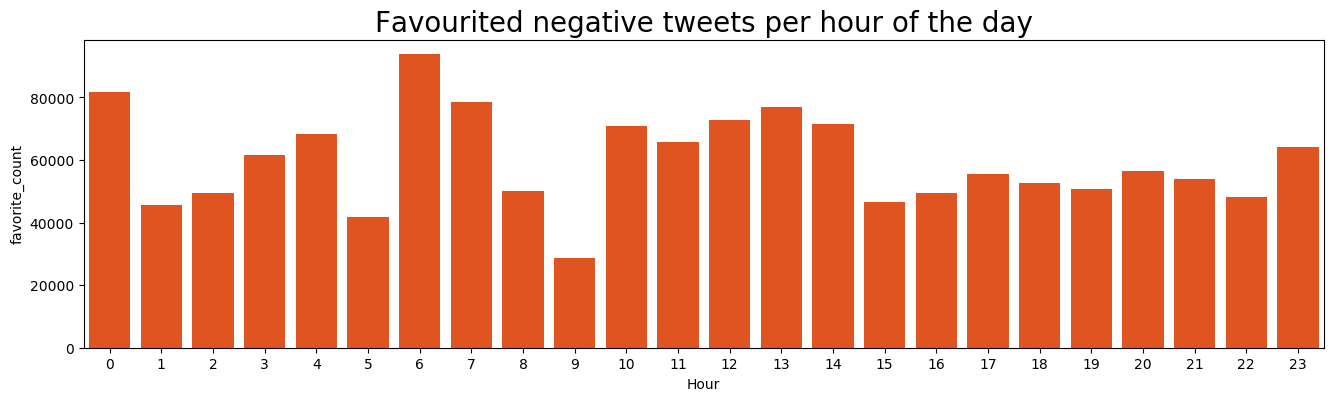

In [236]:
f, ax = plt.subplots(figsize=(16, 4))
#my_palette = sns.color_palette("Red")
plt.title("Favourited negative tweets per hour of the day", fontsize=20)
sns.barplot( x='Hour', y='favorite_count',  data=negative_favorite_sorted,color='orangered', ci=None);
plt.show()

In [237]:
negative_array = negative_tweets['lemmatized_text'].as_matrix().tolist()

In [238]:
negative_strings = ''.join(negative_array)

In [239]:
import re
def clean_tweet(negative_strings):
    tweet = re.sub('http\S+\s*', '', negative_strings)  # remove URLs; http, https,...
    return tweet

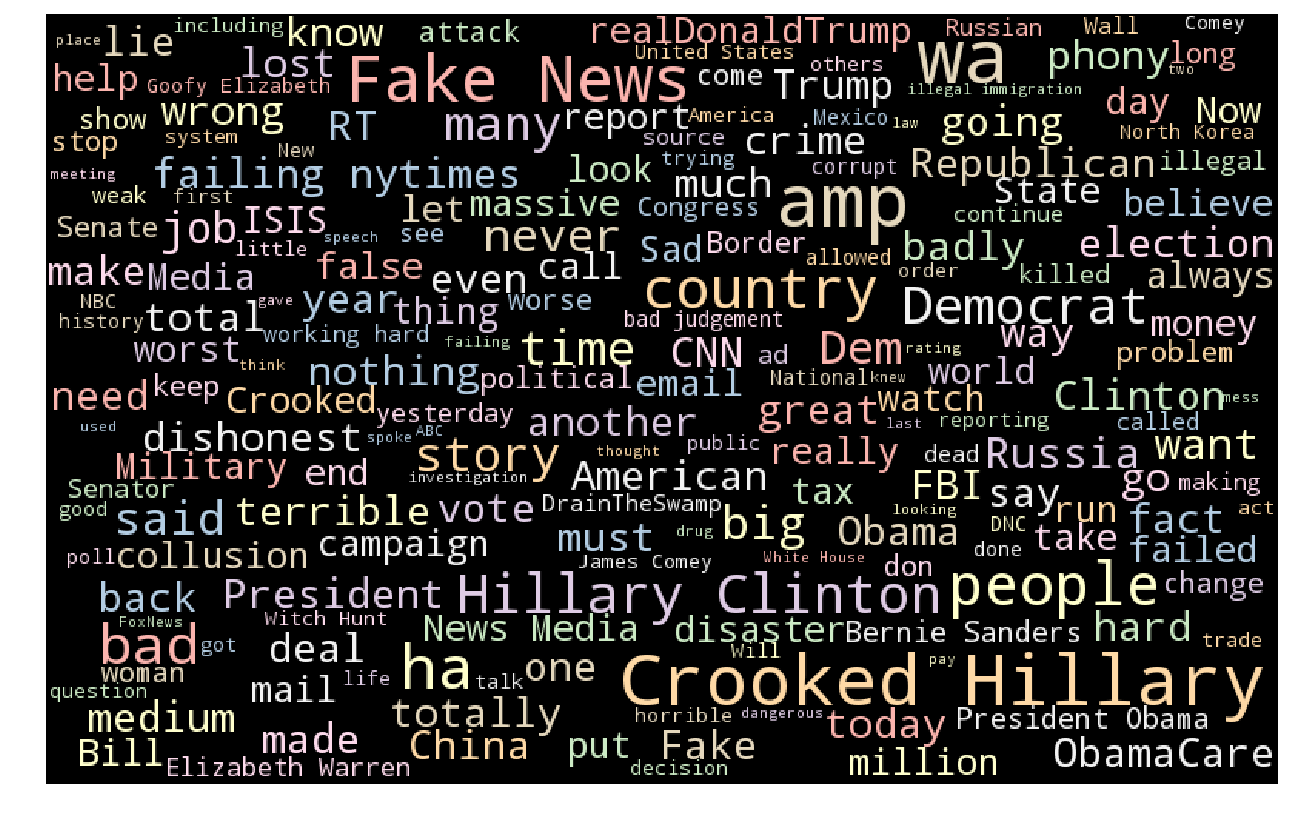

In [401]:
cloud = WordCloud(background_color="black", random_state=42, width=800, height=500, max_words=200,  prefer_horizontal=1.0,colormap='Pastel1',
                          max_font_size=50,).generate(clean_tweet(negative_strings))

plt.figure( figsize=(20,10), facecolor='w') #figsize adjusts resolution!! 200x100 is already pretty good!
plt.imshow(cloud)
plt.axis('off')
plt.show()

### Counting average Favourited and Retweets per each sentiment

In [241]:
#Avg Neutral Favorited
neut_avg_fav = neutral_tweets['favorite_count'].mean()
neut_avg_fav

50275.454834605596

In [242]:
#Avg Neutral Retweeted
neut_avg_rt = neutral_tweets['retweet_count'].mean()
neut_avg_rt

14676.368320610687

In [243]:
#Avg Positive Favorited
posit_avg_fav = positive_tweets['favorite_count'].mean()
posit_avg_fav

57619.0033657442

In [244]:
#Avg Positive Retweeted
posit_avg_rt = positive_tweets['retweet_count'].mean()
posit_avg_rt

14671.238967838444

In [245]:
#Avg Negative Favorited
negat_avg_fav = negative_tweets['favorite_count'].mean()
negat_avg_fav

62713.656829100895

In [246]:
#Avg Negative Retweeted
negat_avg_rt = negative_tweets['retweet_count'].mean()
negat_avg_rt

17962.862731640358

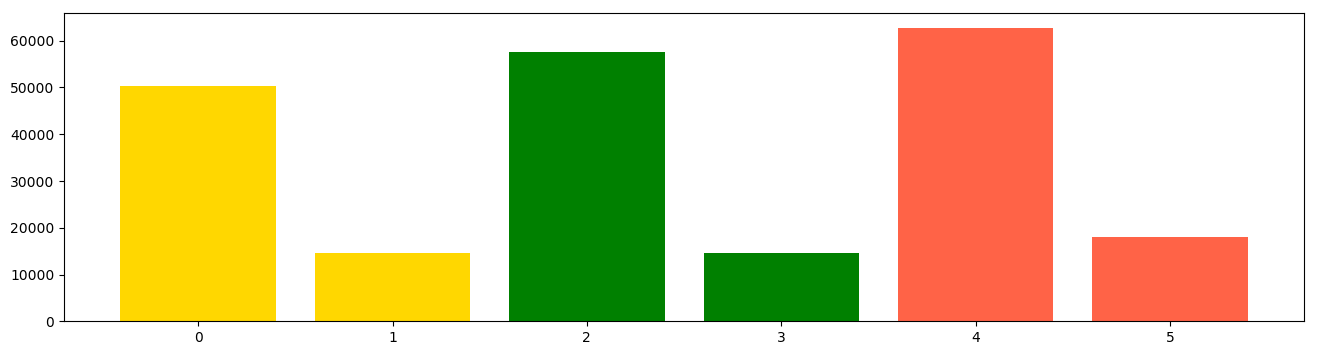

In [247]:
f, ax = plt.subplots(figsize=(16, 4))
values=[neut_avg_fav,neut_avg_rt, posit_avg_fav, posit_avg_rt, negat_avg_fav, negat_avg_rt ]
#colors = ['y','y','g','g', 'r', 'r']
colors =[ '#FFD700', '#FFD700', 'g', 'g', '#FF6347','#FF6347']
plt.bar(range(0,6), values, color=colors)
plt.show()

### Sources of inspiration
These were some of the sources I used for inspiration and assistance in this analysis

https://sweet-as-tandy.com/2017/01/04/what-donald-trump-is-tweeting-analyzing-tweets-with-nltk-and-pandas/

https://github.com/atandy/tweet_analyzer/blob/master/analysis.py

https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

http://help.sentiment140.com/api

http://www.nltk.org/api/nltk.sentiment.html#module-nltk.sentiment

https://textblob.readthedocs.io/en/dev/classifiers.html

https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-

http://www.trumptwitterarchive.com/archive
